It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CV_with_OpenCV.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CV_with_OpenCV.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Introduction to Computer Vision with OpenCV in Python

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products. It has C++, Python, and Java interfaces and supports Windows, Linux, Mac OS, iOS, and Android.

**Installing OpenCV:**
```python
!pip install opencv-python
```

In [2]:
!pip install opencv-python

最常见（uint8）：RGB 每个通道取值 0–255，像素是三元组 [R,G,B]。

OpenCV 读图默认是 BGR 顺序，但范围也是 0–255。

Pillow/Matplotlib 常用 RGB 顺序，范围同样 0–255。

浮点图（float32/64）：很多库约定 0.0–1.0。超出这个范围的值在显示时会被裁剪或失真。

高位深：

16-bit：每通道 0–65535（uint16）。

HDR/线性空间：常用 float，范围可大于 1 或小于 0（取决于流程）。


# Reading, Writing, and Displaying Images

## Reading Images

OpenCV allows you to read images in various formats. The most common method is using `cv2.imread()`. This function loads an image from a file and returns it as a NumPy array. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format), this function returns an empty matrix.

- Syntax: `cv2.imread(path, flag)`
- Flags:
  - `cv2.IMREAD_COLOR` or `1`: Loads a color image. Any transparency is ignored (default).
  - `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode.
  - `cv2.IMREAD_UNCHANGED` or `-1`: Loads image as such including alpha channel.
  
In OpenCV, when you load an image using `cv2.imread()`, the image is automatically read in BGR (Blue, Green, Red) format by default. This is different from the RGB (Red, Green, Blue) format that is commonly used in many other image processing libraries and applications.

The difference between these two formats is the order of color channels:

- **BGR**: The blue channel comes first, followed by green, and then red.
- **RGB**: The red channel comes first, followed by green, and then blue.

```python
# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
```

读/写/显示图像（OpenCV）
读图 cv2.imread(path, flag)

作用：从文件读图，返回 NumPy 数组。读失败会返回 None（不是报错）。

flag（第二个参数）：

cv2.IMREAD_COLOR 或 1：彩色，忽略透明通道（默认）。

cv2.IMREAD_GRAYSCALE 或 0：灰度。

cv2.IMREAD_UNCHANGED 或 -1：原样读入（保留 alpha）。

重要：OpenCV 读进来是 BGR 顺序（Blue, Green, Red），不是常见的 RGB。

BGR vs RGB（必知）

BGR：通道顺序是 B, G, R（OpenCV 内部默认）。

RGB：通道顺序是 R, G, B（Pillow/Matplotlib/多数深度学习示例）。

In [3]:
import cv2
import urllib
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
from PIL import Image
from io import BytesIO

# Download an image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

req = Request(url, headers={"User-Agent": "Mozilla/5.0"})
with urlopen(req, timeout=15) as resp:
    data = resp.read()

# 保存或直接打开
with open("sample.png", "wb") as f:
    f.write(data)

image = Image.open(BytesIO(data))
image.show()


# Path to the image
image_path = "sample.png"

# Read the image in color mode
image_color = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Read the image in grayscale mode
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Transform to RGB
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

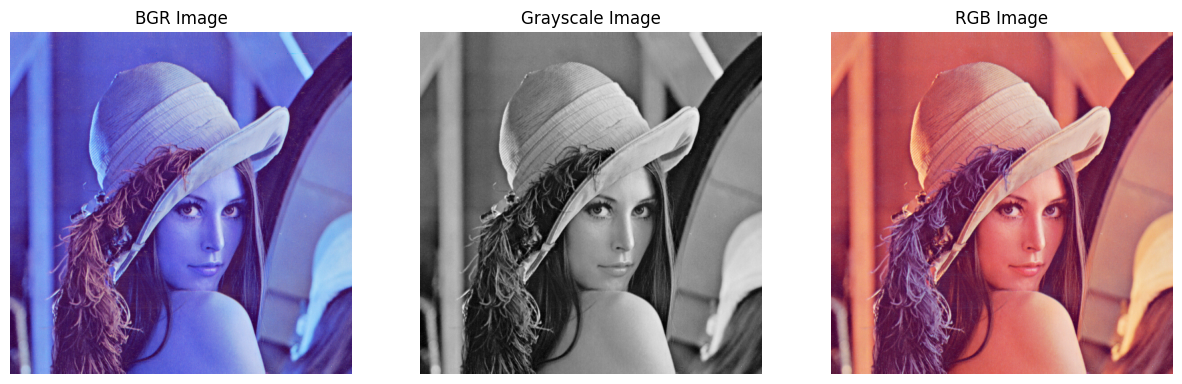

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot original BGR image
axes[0].imshow(image_color)  # Convert BGR to RGB for correct color representation in matplotlib
axes[0].set_title("BGR Image")
axes[0].axis('off')  # Hide axis

# Plot grayscale image
axes[1].imshow(image_gray, cmap='gray')  # Grayscale image
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

# Plot RGB image
axes[2].imshow(image_rgb)  # RGB image
axes[2].set_title("RGB Image")
axes[2].axis('off')

plt.show()

## Writing Images

Saving an image in OpenCV is accomplished using the `cv2.imwrite()` function. It saves an image to a specified file. The image format is chosen based on the filename extension.

- Syntax: `cv2.imwrite(filename, img, params)`
- Parameters:
  - `filename`: String representing the file name.
  - `img`: Image to be saved.
  - `params`: Optional parameters.

Example:
```python
# Save the grayscale image
cv2.imwrite("path_to_save_gray_image.jpg", image_gray)
```

# Basic Image Manipulation with OpenCV

In this section, we will explore basic image manipulation techniques such as resizing, rotating, and cropping images using OpenCV. These operations are fundamental in many computer vision tasks.

## Resizing Images

Resizing is one of the most common operations. It's used to change the dimensions of an image. In OpenCV, `cv2.resize()` function is used for this purpose.

- Syntax: `cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`
- Parameters:
  - `src`: Input image.
  - `dsize`: Desired size for the output image.
  - `fx` and `fy`: Scale factors along the horizontal and vertical axes respectively.
  - `interpolation`: Interpolation method. Common methods include `cv2.INTER_LINEAR`, `cv2.INTER_NEAREST`, `cv2.INTER_AREA`, `cv2.INTER_CUBIC`, and `cv2.INTER_LANCZOS4`. The choice of interpolation method affects the quality and processing time.

Interpolation methods:
- `cv2.INTER_LINEAR`: This is a good default choice for both upsizing and downsizing.
- `cv2.INTER_NEAREST`: Fastest but may produce jagged edges.
- `cv2.INTER_AREA`: Recommended for downsizing as it may produce moiré-free results.
- `cv2.INTER_CUBIC`: Slower but more effective for upsizing.
- `cv2.INTER_LANCZOS4`: Offers high-quality results.


image shape: (300, 300, 3)


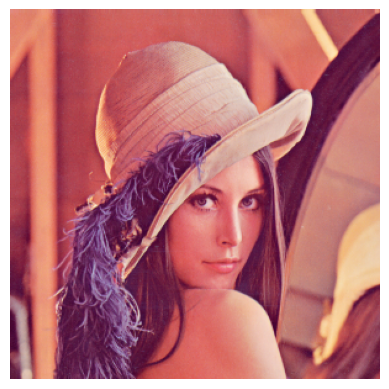

In [5]:
resized_image_1 = cv2.resize(image_rgb, (300, 300), interpolation=cv2.INTER_LINEAR)
print(f'image shape: {resized_image_1.shape}')
plt.imshow(resized_image_1)
plt.axis('off')
plt.show()

image shape: (256, 256, 3)


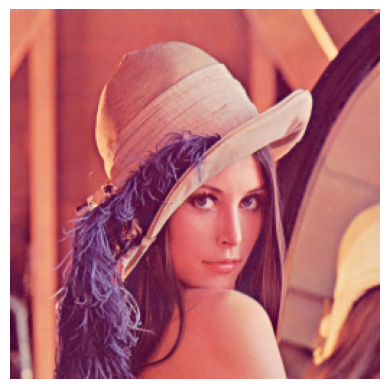

In [6]:
resized_image_2 = cv2.resize(image_rgb, (0, 0), fx=0.5, fy=0.5)
print(f'image shape: {resized_image_2.shape}')
plt.imshow(resized_image_2)
plt.axis('off')
plt.show()

## Rotating Images

Rotation of an image for an angle θ is achieved by the transformation matrix. In OpenCV, you use `cv2.getRotationMatrix2D` and `cv2.warpAffine` to rotate images.

- `cv2.getRotationMatrix2D(center, angle, scale)` creates a 2x3 rotation matrix.
  - `center`: Center of the rotation in the source image.
  - `angle`: Rotation angle in degrees. Positive values mean counter-clockwise rotation.
  - `scale`: Isotropic scale factor.

- `cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])` applies the rotation.
  - `src`: Input image.
  - `M`: Transformation matrix.
  - `dsize`: Size of the output image.
  - `flags`, `borderMode`, `borderValue`: Additional options for the transformation.

To apply a transformation matrix to an image in OpenCV, particularly for rotation, we use affine transformations. An affine transformation is a linear mapping method that preserves points, straight lines, and planes. When rotating an image, each point of the original image is moved to a new location in the output image.

### Formula for Rotation Transformation

The transformation of a point \((x, y)\) in the image to a new point \((x', y')\) after rotation by an angle \(\theta\) is given by the following formulas:

\[
\begin{align*}
x' &= x \cos \theta - y \sin \theta \\
y' &= x \sin \theta + y \cos \theta
\end{align*}
\]

However, when rotations are performed around an arbitrary point \((c_x, c_y)\), we first translate the image so that the center of rotation is at the origin (0,0), rotate the image, and then translate it back.

### Scale: Isotropic Scale Factor

The scale factor in the rotation matrix is an isotropic scale factor. "Isotropic" means that the scaling is uniform in all directions. A scale factor \(s\) different from 1 will either enlarge (if \(s > 1\)) or shrink (if \(s < 1\)) the image. The scaling is performed with respect to the center of rotation.

### Rotation Matrix

The rotation matrix \(M\) obtained from `cv2.getRotationMatrix2D` in OpenCV is a 2x3 matrix that combines these transformations (rotation, translation, scaling):

\begin{equation}
M = \begin{bmatrix}
s \cdot \cos \theta & -s \cdot \sin \theta & (1 - s \cdot \cos \theta) \cdot c_x + s \cdot \sin \theta \cdot c_y \\
s \cdot \sin \theta & s \cdot \cos \theta & (1 - s \cdot \cos \theta) \cdot c_y - s \cdot \sin \theta \cdot c_x
\end{bmatrix}
\end{equation}

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


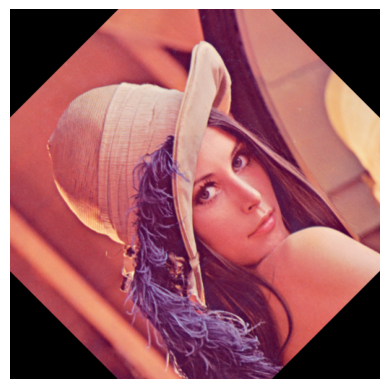

In [7]:
# Get the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((image_rgb.shape[1]/2, image_rgb.shape[0]/2), 45, 1)
print(rotation_matrix)
# Perform the rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image_rgb.shape[1], image_rgb.shape[0]))

plt.imshow(rotated_image)
plt.axis('off')
plt.show()

In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider

def rotate_image(angle, center_x, center_y, scale):
    rows, cols, _ = image_color.shape
    M = cv2.getRotationMatrix2D((center_x, center_y), angle, scale)
    rotated = cv2.warpAffine(image_color, M, (cols, rows))
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

interact(rotate_image,
         angle=IntSlider(min=-180, max=180, step=1, value=0),
         center_x=FloatSlider(min=0, max=image_color.shape[1], step=0.1, value=image_color.shape[1]/2),
         center_y=FloatSlider(min=0, max=image_color.shape[0], step=0.1, value=image_color.shape[0]/2),
         scale=FloatSlider(min=0.1, max=3, step=0.1, value=1));


## Cropping Images

Cropping involves cutting out a portion of an image. In OpenCV, this can be done by slicing the NumPy array.


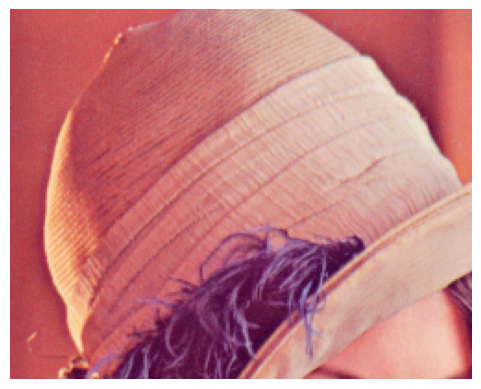

In [9]:
# Crop the image
cropped_image = image_rgb[50:250, 100:350]  # Crop from x=100, y=50 to x=300, y=200

plt.imshow(cropped_image)
plt.axis('off')
plt.show()

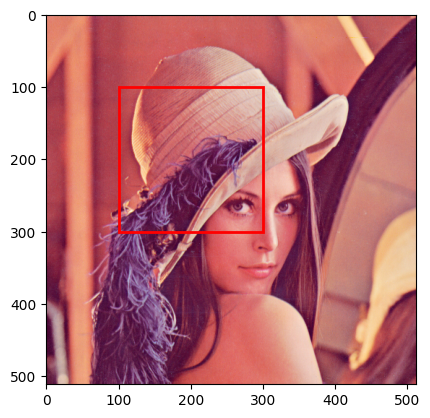

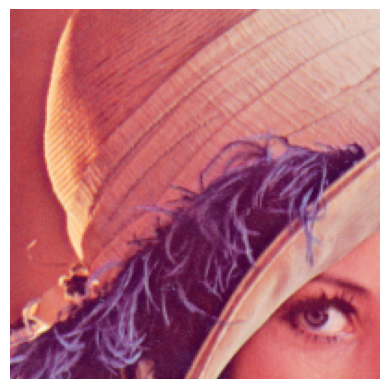

In [10]:
import matplotlib.patches as patches

# Define the crop box coordinates (x, y, width, height)
crop_box = (100, 100, 200, 200)  # (x, y, width, height)

# Create a Rectangle patch
rect = patches.Rectangle((crop_box[0], crop_box[1]), crop_box[2], crop_box[3], linewidth=2, edgecolor='r', facecolor='none')

# Plot the original image and the rectangle
fig, ax = plt.subplots()
ax.imshow(image_rgb)
ax.add_patch(rect)
plt.show()

# Define the box to crop
# Note: OpenCV uses the format (y, y+h, x, x+w) for cropping
cropped_image = image_rgb[crop_box[1]:crop_box[1] + crop_box[3], crop_box[0]:crop_box[0] + crop_box[2]]

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')
plt.show()


# Image Thresholding with OpenCV

Image thresholding is a simple, yet effective, way of partitioning an image into a foreground and background. This is done by selecting a threshold value, and then classifying all pixels above this threshold as belonging to the foreground (usually white) and all pixels below this threshold as belonging to the background (usually black).

OpenCV 阈值分割（Thresholding）

目的：把图像按阈值分成前景/背景（通常白/黑）。

## Basic Thresholding

The most basic form of thresholding applies a fixed level threshold to each pixel. The general form of the thresholding operation on an image \( f(x, y) \) can be expressed as:

\begin{equation}
 g(x, y) = \begin{cases}
\text{maxVal} & \text{if } f(x, y) > \text{threshold} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

In OpenCV, this is implemented using the `cv2.threshold` function.

- Syntax: `retval, dst = cv2.threshold(src, thresh, maxval, type)`
- Parameters:
  - `src`: Input image (grayscale).
  - `thresh`: Threshold value.
  - `maxval`: Maximum value to use with the binary thresholding operations.
  - `type`: Thresholding type (e.g., `cv2.THRESH_BINARY`, `cv2.THRESH_BINARY_INV`, etc.)

Example of basic thresholding:


src：灰度图（先 cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)）

thresh：阈值（0–255）

maxval：超过阈值时赋的值（常用 255）

type：阈值类型：

cv2.THRESH_BINARY：>thresh → maxval，否则 0

cv2.THRESH_BINARY_INV：反转

cv2.THRESH_TRUNC：>thresh 的像素截断为阈值

cv2.THRESH_TOZERO / _INV：阈值以下（或以上）置 0

retval：返回使用的阈值（和 Otsu/三角法时有用）

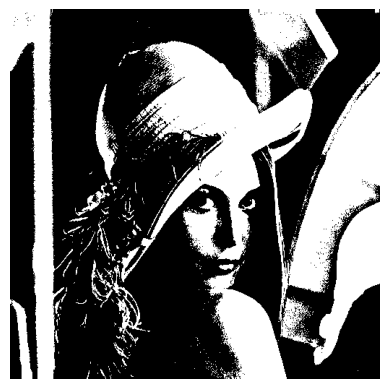

In [11]:
# Convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Apply basic thresholding
ret, thresh_basic = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_basic, cmap='gray')
plt.axis('off')
plt.show()

## Adaptive Thresholding

Adaptive thresholding changes the threshold value based on the image characteristics. In adaptive thresholding, the threshold value is determined for smaller regions. This leads to different threshold values for different regions of the same image, which is useful in case of varying lighting conditions across the image.

OpenCV provides `cv2.adaptiveThreshold` for this purpose.

- Syntax: `dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`
- Parameters:
  - `maxValue`: Non-zero value assigned to the pixels for which the condition is satisfied.
  - `adaptiveMethod`: Adaptive method decides how the threshold value is calculated (e.g., `cv2.ADAPTIVE_THRESH_MEAN_C`, `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`).
    1. **`cv2.ADAPTIVE_THRESH_MEAN_C`:**
       - This method calculates the mean of the `blockSize` x `blockSize` neighborhood of each pixel (excluding the pixel itself) and subtracts `C` from this mean to determine the pixel's threshold.
       - It's useful for images with a relatively uniform brightness, where the goal is to highlight the central tendencies in local areas of the image.

    2. **`cv2.ADAPTIVE_THRESH_GAUSSIAN_C`:**
           - This method calculates the weighted sum of the `blockSize` x `blockSize` neighborhood, where the weights are a Gaussian window, and subtracts `C` from this sum to determine the pixel's threshold.
           - It's more sophisticated and considers the spatial distribution of pixel intensities, making it more suitable for images with varying illumination conditions.

  - `blockSize`: Size of a pixel neighborhood that is used to calculate a threshold value. It must be an odd number greater than 1
    - A larger `blockSize` considers a larger area for local thresholding, which can be useful for images with more significant variations in lighting. However, it might also reduce the detail in the thresholded image.
  - `C`: Constant subtracted from the mean or weighted mean.
      - `C` allows fine-tuning of the thresholding. It serves as a bias in the threshold calculation.
      - If `C` is positive, it makes the algorithm more aggressive, producing a more contrasted image by making the dark regions darker.
      - If `C` is negative, it makes the algorithm less sensitive, which might retain more details but could also include more noise.


src：灰度图（先 cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)）。

maxValue：阈上赋值（常 255）。

adaptiveMethod：

cv2.ADAPTIVE_THRESH_MEAN_C：邻域 均值 − C

cv2.ADAPTIVE_THRESH_GAUSSIAN_C：邻域 高斯加权均值 − C（对光照变化更稳，常更好）

thresholdType：cv2.THRESH_BINARY 或 cv2.THRESH_BINARY_INV

blockSize：邻域大小，奇数且 > 1（如 11、15、21）。越大→更平滑、细节可能被抹。

C：从（加权）均值里减去的常数。

C > 0：更“激进”（暗区更容易变黑，前景更白）

C < 0：更“宽松”（保留更多细节，也可能带来噪点）

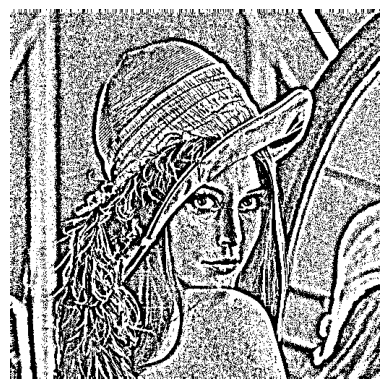

In [12]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
from ipywidgets import interact, widgets

def interactive_thresholding(thresh_type, threshold, block_size, C):
    if thresh_type == 'Binary':
        _, th = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'Adaptive Mean':
        th = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif thresh_type == 'Adaptive Gaussian':
        th = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

    plt.imshow(th, cmap='gray')
    plt.axis('off')
    plt.show()

interact(interactive_thresholding,
         thresh_type=widgets.Dropdown(options=['Binary', 'Adaptive Mean', 'Adaptive Gaussian'], value='Binary', description='Threshold Type:'),
         threshold=widgets.IntSlider(min=0, max=255, step=1, value=127, description='Threshold:'),
         block_size=widgets.IntSlider(min=3, max=21, step=2, value=11, description='Block Size:', disabled=False),
         C=widgets.IntSlider(min=0, max=10, value=2, description='C Value:')
        );


# Question 1: Read the image of the bill in grayscale, rotate it to a vertical orientation, and apply an appropriate thresholding technique to improve the image quality.

In [ ]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/bill_1.jpg?raw=true'
image_path = "bill_1.jpeg"
urllib.request.urlretrieve(url, image_path)

In [ ]:
# Read the image in grayscale mode
image_gray = cv2.imread(..., cv2..)

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D(
    (image_gray.shape[1]/2, image_gray.shape[0]/2), ..., 1
)

# Perform the rotation
rotated_image = cv2.warpAffine(..., ..., (image_gray.shape[1], image_gray.shape[0]))

plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Apply basic thresholding to rotated_image
# ret, img_thresh = cv2.threshold(...)

# Or apply  adaptive thresholding to rotated_image
# img_thresh = cv2.adaptiveThreshold(rotated_image, 255, ..., ..., ..., ...)

plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.show()

# Histogram Equalization in OpenCV

Histogram equalization is a technique for adjusting image intensities to enhance contrast. It's particularly useful in images with backgrounds and foregrounds that are both bright or both dark.

## Understanding Histograms in Image Processing

A histogram represents the distribution of pixel intensities (whether in grayscale or color channels) in an image. It plots the number of pixels for each intensity value.

### Displaying a Histogram for a Real Image

First, let's see how to display a histogram for a grayscale image:




直方图均衡化（Histogram Equalization）：把灰度分布“拉开、铺匀”，让暗处更亮、亮处更分明，从而增强对比度。
适合：整体偏暗/偏亮、对比度低的图（雾天、欠曝、老照片、扫描件）。

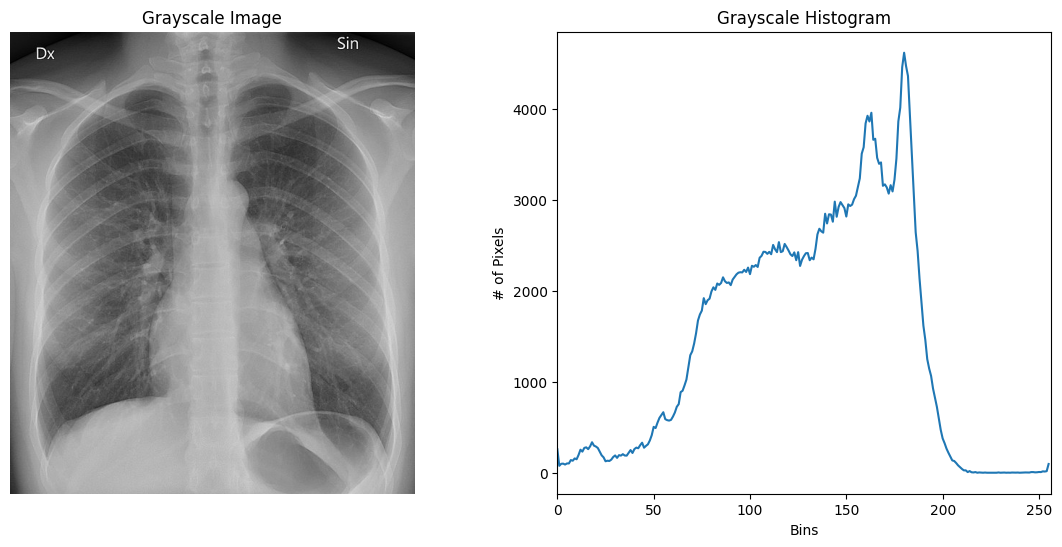

In [13]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg/560px-Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg'
# image_path = "x-ray.jpeg"
# urllib.request.urlretrieve(url, image_path)

req = Request(url, headers={"User-Agent": "Mozilla/5.0"})
with urlopen(req, timeout=15) as resp:
    data = resp.read()

# 保存或直接打开
with open("x-ray.jpeg", "wb") as f:
    f.write(data)

image = Image.open(BytesIO(data))
image.show()


# Path to the image
image_path = "x-ray.jpeg"

# Load an image in grayscale
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


# Plot the image and its histogram
plt.figure(figsize=(14, 6))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Display the histogram
plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

plt.show()

gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
读入 灰度图，得到 uint8 数组，像素范围 0–255。

hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
计算灰度直方图：

[gray_image]：输入图像列表

[0]：第 0 个通道（灰度只有一个通道）

None：不使用掩码

[256]：直方图的桶数（bins）= 256

[0, 256]：像素强度的取值范围（左闭右开），覆盖 0..255

下面两段 plt.subplot(...); plt.imshow(...); plt.plot(hist)
左边显示灰度图，右边画直方图（每个 bin 对应某个强度段的像素计数）。

“256” 到底指什么

在 8-bit 灰度图中，每个像素是 0–255 的整数，共 256 个可能值。

因此我们把直方图分成 256 个 bin，一一对应每个亮度值。

如果是更高位深或浮点图，bin 和范围要改：

16-bit：histSize=[65536], ranges=[0,65536]（通常会下采样，如 256/1024 bins）

浮点（0–1）：histSize=[256], ranges=[0,1]

## Histogram Equalization

Histogram equalization improves the contrast of an image by stretching out the intensity range.

### Concept

The idea is to spread out the most frequent intensity values, i.e., to stretch the histogram horizontally on both sides, making the dark pixels darker and the bright pixels brighter. This often increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values.

### Mathematical Formulation

Given a grayscale image \( I \), histogram equalization works by first calculating the normalized histogram \( H(v) \) for each intensity level \( v \). Then, a cumulative distribution function (CDF) is computed, which is essentially a cumulative sum of the normalized histogram values:

\begin{equation}
CDF(v) = \sum_{i=0}^{v} H(i)
\end{equation}

The equalized image \( I_{eq} \) is obtained by mapping each pixel intensity \( v \) in the original image to a new intensity level using the CDF:

\begin{equation}
I_{eq}(x, y) = \text{round} \left( \frac{CDF(I(x, y)) - \text{min}(CDF)}{\text{max}(CDF) - \text{min}(CDF)} \times 255 \right)
\end{equation}

把灰度值的累计分布（CDF）当作“新灰度”，把原图的像素整体拉开区分度：暗的更暗、亮的更亮 → 提升对比度。

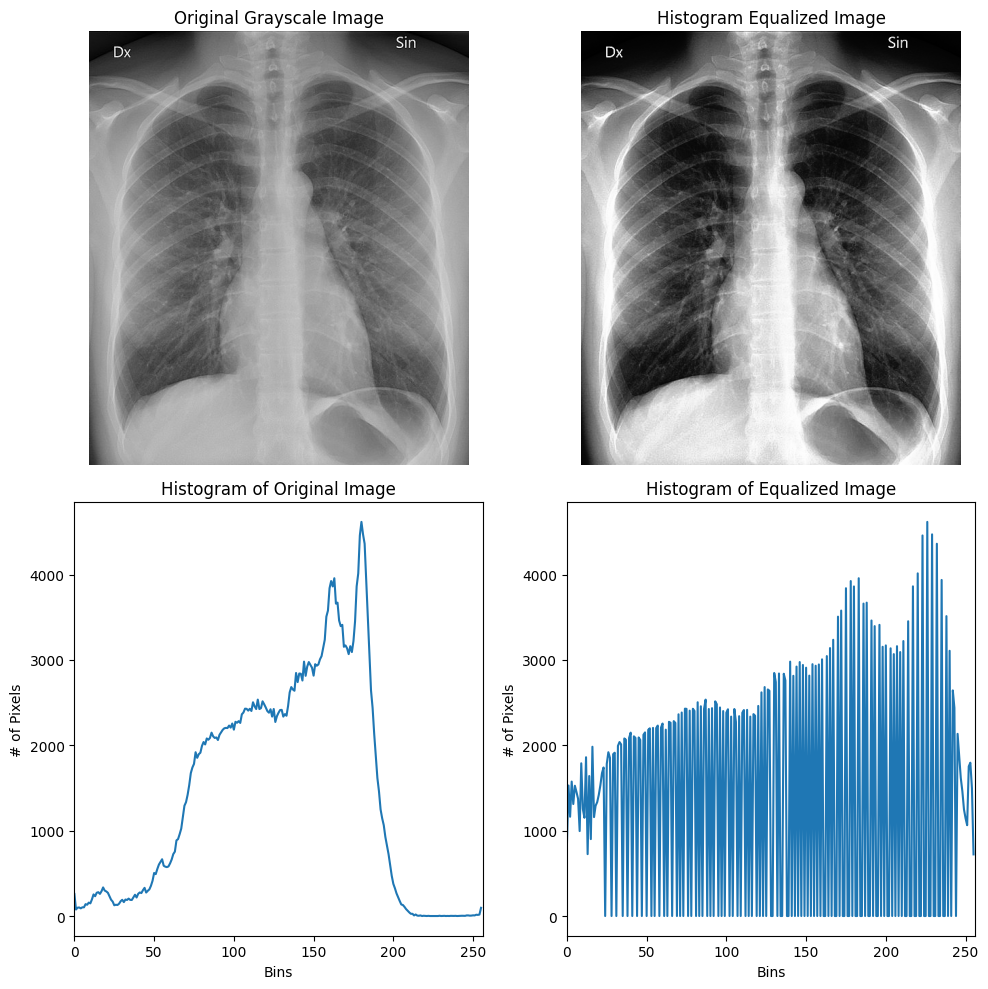

In [14]:
equalized_image = cv2.equalizeHist(gray_image)

# Calculate histograms
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Create a 2x2 subplot
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Display the histogram for the original image
plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title("Histogram of Original Image")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

# Display the equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

# Display the histogram for the equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title("Histogram of Equalized Image")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

## CLAHE: Contrast Limited Adaptive Histogram Equalization

CLAHE is a variant of adaptive histogram equalization in which the image is divided into small blocks called "tiles" (e.g., 8x8). Then, histogram equalization is applied to each of these blocks separately. This method prevents over-amplification of noise that is typical in the standard histogram equalization technique.

### Key Features of CLAHE:
- **Local Contrast Enhancement:** Unlike standard histogram equalization, which applies a global contrast enhancement, CLAHE enhances the contrast locally.
- **Contrast Limiting:** To prevent noise amplification, CLAHE applies contrast limiting. If any histogram bin is above the specified contrast limit, those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.

### Mathematical Overview:
CLAHE operates similarly to adaptive histogram equalization but with an additional contrast limiting step. After computing the histogram for each block, the histogram is clipped at a predefined value, ensuring that the enhancement doesn’t increase the noise.


CLAHE（对比度受限自适应直方图均衡化）**的通俗说明。

它在做什么（一句话）

把图像按小块（tiles，比如 8×8）分别做直方图均衡化，并限制每块的对比度提升，既能增强局部对比度，又不把噪声过度放大。

和普通均衡化的区别

普通均衡化（equalizeHist）：整张图用一个映射 → 快，但容易过度、放大噪声。

CLAHE：分块 + 限幅（clip）→ 对光照不均的图更稳，细节更自然。

### Applying CLAHE in OpenCV:
OpenCV provides the `createCLAHE` function to apply CLAHE.


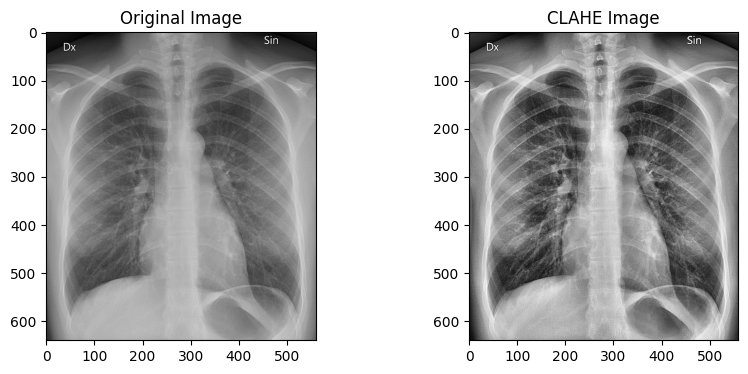

In [15]:
# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(gray_image)

# Display the original and CLAHE-enhanced image
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(clahe_image, cmap='gray'), plt.title('CLAHE Image')
plt.show()

In [ ]:
def view_clahe(clip_limit, tile_grid_size):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_grid_size, tile_grid_size))
    clahe_image = clahe.apply(gray_image)

    plt.imshow(clahe_image, cmap='gray')
    plt.axis('off')
    plt.show()

interact(view_clahe,
         clip_limit=widgets.FloatSlider(min=1, max=5, step=0.1, value=2),
         tile_grid_size=widgets.IntSlider(min=1, max=16, step=1, value=8));
